In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import geopandas
import dataretrieval.nwis as nwis
import contextily as cx
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
from pynhd import NLDI, WaterData, NHDPlusHR, NHD
import pynhd as nhd
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42

/opt/miniconda3/lib/python3.9/site-packages/dataretrieval/nadp.py:44: UserWarning: GDAL not installed. Some functions will not work.
  warnings.warn('GDAL not installed. Some functions will not work.')


In [3]:
starkey = geopandas.read_file("../data/starkey/mygeodata/Starkey_Experimental_Forest_and_Range_Streams.gdb-line.shp") #https://www.fs.usda.gov/rds/archive/catalog/RDS-2018-0019
s_type = {'Perennial': 'perennial',
          'Intermittent': 'non-perennial' ,
          'Ephemeral': 'non-perennial'}

starkey['stype']=starkey['NHDType'].map(s_type)
starkey['SUETstype']=starkey['StarkeyTyp'].map(s_type)

# starkey_repro = starkey.to_crs(epsg=4269)
starkey_repro = starkey.to_crs(epsg=3857)

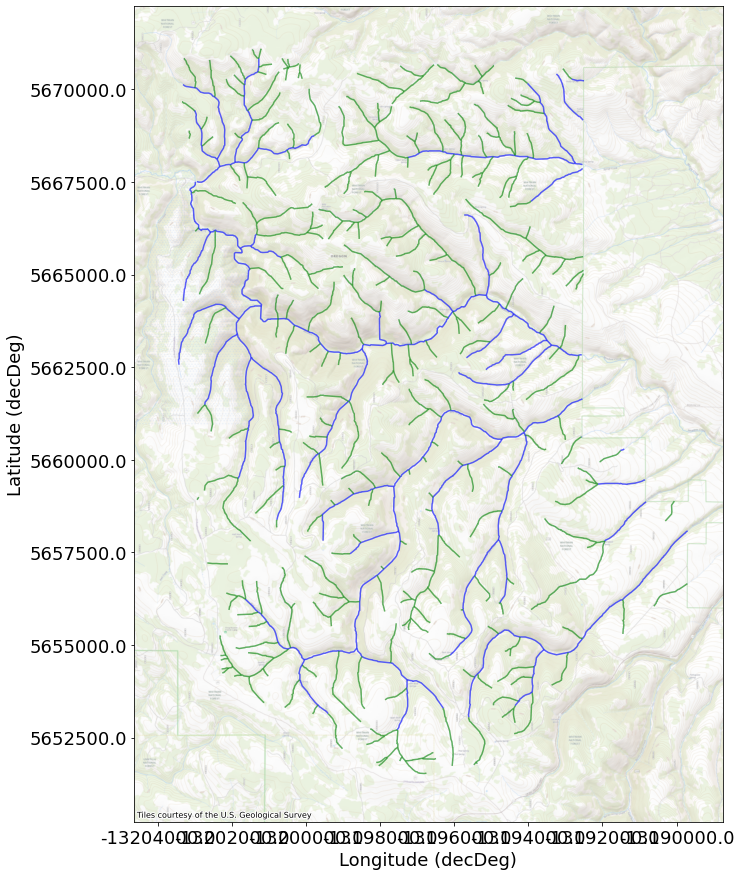

In [281]:
starkey_repro = starkey.to_crs(epsg=3857)

plt.rcParams.update({'font.size': 18})

color_map = {'perennial': 'blue',
          'non-perennial': 'green'}

f,ax = plt.subplots(figsize=(15, 15))

starkey_repro.plot(ax=ax,legend=True,color = starkey_repro['stype'].map(color_map),alpha= .6)

# ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
#           head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
# ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cx.add_basemap(ax ,reset_extent= False,zoom=15,source=cx.providers.USGS.USTopo,alpha=0.75)

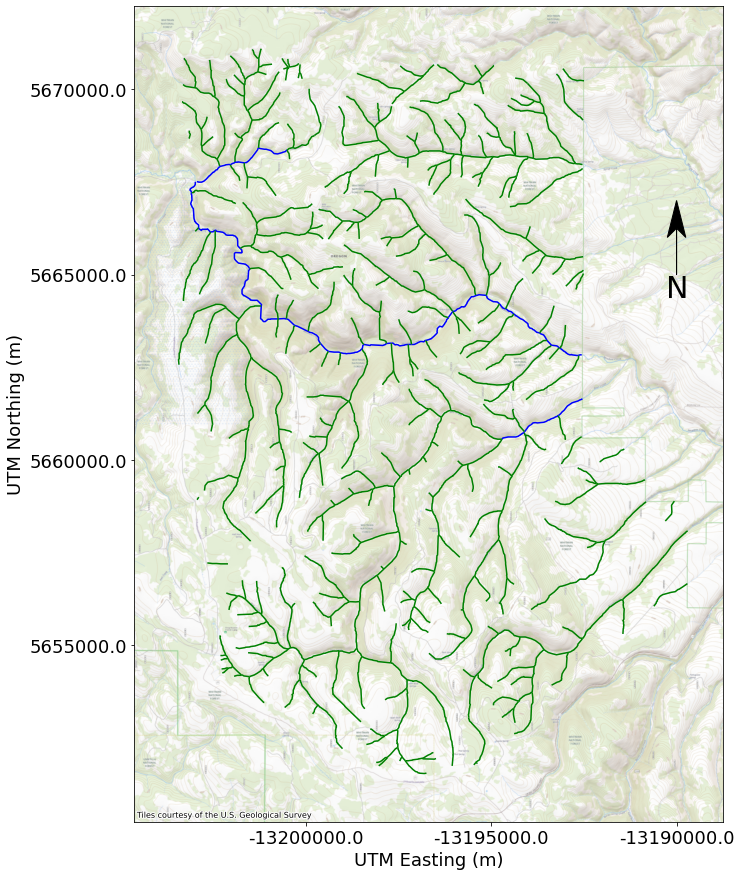

In [320]:
# starkey_repro = starkey.to_crs(epsg=3857)

plt.rcParams.update({'font.size': 18})

color_map = {'perennial': 'blue',
          'non-perennial': 'green'}

f,ax = plt.subplots(figsize=(15, 15))

starkey_repro.plot(ax=ax,legend=True,color = starkey_repro['SUETstype'].map(color_map))


ax.arrow(-13190000, 5665000, 0, 2000, length_includes_head=True,
          head_width=500, head_length=1000, overhang=.25, facecolor='k')
ax.text(x=-13190280, y=5664400, s='N', fontsize=30)
ax.set_xlabel("UTM Easting (m)")
ax.set_ylabel("UTM Northing (m)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=4)
cx.add_basemap(ax ,reset_extent= False,zoom=15,source=cx.providers.USGS.USTopo)
plt.savefig('../docs/starkey_NPmap.png',dpi=300)

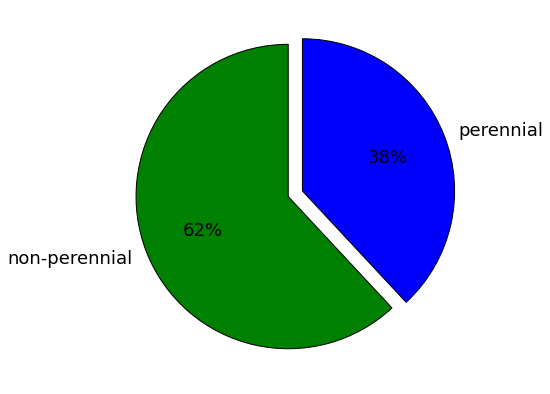

In [235]:
f,ax = plt.subplots(figsize=(7, 7))


starkey_count = starkey.groupby(['stype'])['Shape_Leng'].agg('sum').to_frame()
plt.rcParams.update({'font.size': 18})
colors = ['green', 'blue']
explode = (0, 0.1)
plt.pie(starkey_count['Shape_Leng'], 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = starkey_count.index)
plt.savefig('../docs/starkey_NPpie.png',dpi=600)

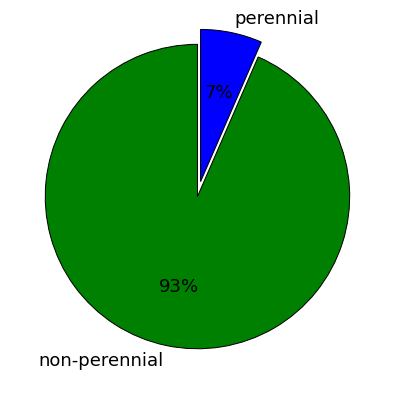

In [279]:
f,ax = plt.subplots(figsize=(7, 7))


starkey_count = starkey.groupby(['SUETstype'])['Shape_Leng'].agg('sum').to_frame()
plt.rcParams.update({'font.size': 18})
colors = ['green', 'blue']
explode = (0, 0.1)
plt.pie(starkey_count['Shape_Leng'], 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = starkey_count.index)
plt.savefig('../docs/starkey_SUETNPpie.png',dpi=600,bbox_inches = "tight")

In [ ]:
from affine import Affine
import xarray as xr

dataarray = xr.open_rasterio('../data/starkey/SPP_MEAN.tif')

# df = dataarray[0].to_pandas()ii

transform = Affine.from_gdal(*dataarray.attrs['transform'])
# Create meshgrid from geotiff
nx, ny = dataarray.sizes['x'], dataarray.sizes['y']
x, y = np.meshgrid(np.arange(nx), np.arange(ny)) * transform


In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
ax.coastlines(resolution='10m', alpha=0.1)
ax.contourf(x, y, da.variable.data[0], cmap='Greys')
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
plt.show()

In [4]:
## https://github.com/hyriver/pynhd


usfs = geopandas.read_file("../data/starkey/S_USA.AdministrativeForest/S_USA.AdministrativeForest.shp")
# starkey_repro = starkey.to_crs(epsg=4269)
usfs = usfs[usfs['REGION']=='06']
walwat = usfs[usfs['FORESTNUMB']=='16']

In [5]:
walwat = walwat.reset_index(drop=True)

hr = nhd.NHD("flowline_hr")
nhdp_hr = hr.bygeom(walwat.geometry[0].bounds)
nhdp_hr = nhdp_hr.to_crs(epsg=4269)

In [6]:
## Just 
nhdp_hrNP = nhdp_hr[(nhdp_hr["fcode"]<=46007) & (nhdp_hr["ftype"]==460)]
s_type = {46000: 'perennial',
             46006:'perennial',
          46003: 'non-perennial' ,
          46007: 'non-perennial'}

nhdp_hrNP['stype']=nhdp_hrNP['fcode'].map(s_type)


/opt/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
walwatNP = geopandas.clip(nhdp_hrNP, walwat)

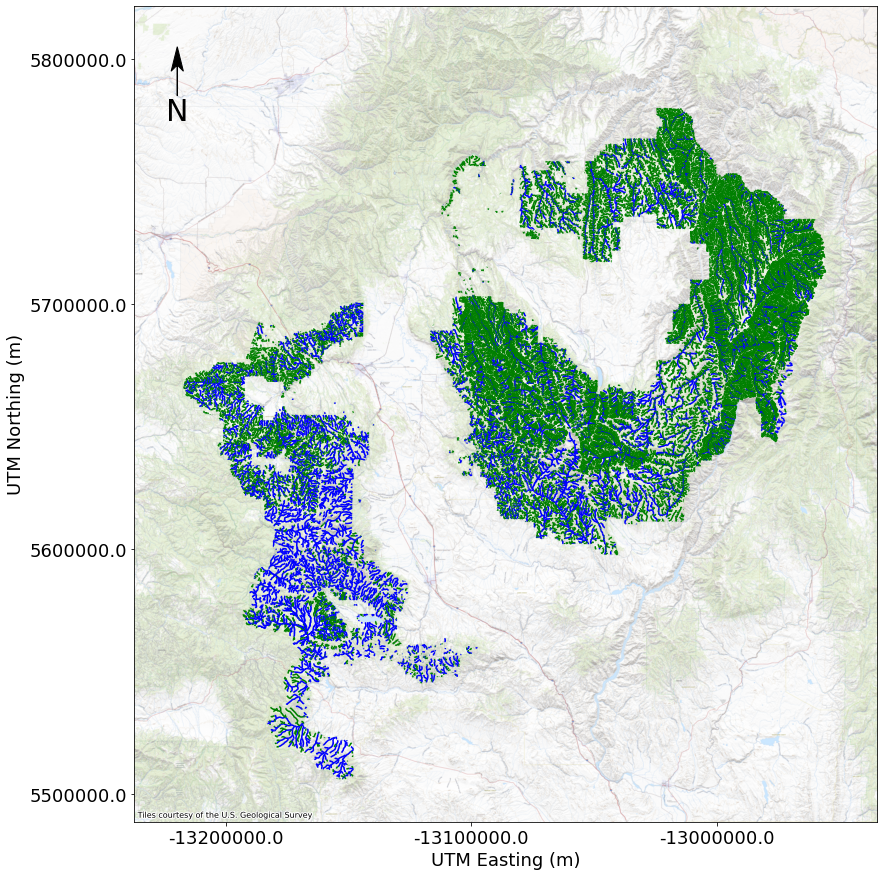

In [32]:
f,ax = plt.subplots(figsize=(15, 15))

walwatNP_repro = walwatNP.to_crs(epsg=3857)
walwat_repro = walwat.to_crs(epsg=3857)

# walwatNP.plot(ax=ax,alpha = 0.5,color = walwatNP['stype'].map(color_map))
# walwat.plot(ax=ax,edgecolor="black",facecolor="none")

# plt.rcParams.update({'font.size': 18})
# ax.set_xlabel("Longitude (decDeg)")
# ax.set_ylabel("Latitude (decDeg)")
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# starkey_repro = starkey.to_crs(epsg=3857)

plt.rcParams.update({'font.size': 18})

color_map = {'perennial': 'blue',
          'non-perennial': 'green'}

walwatNP_repro.plot(ax=ax,legend=True,color = walwatNP_repro['stype'].map(color_map))


ax.arrow(-13220000, 5785000, 0, 20000, length_includes_head=True,
          head_width=5000, head_length=10000, overhang=.25, facecolor='k')
ax.text(x=-13224500, y=5775000, s='N', fontsize=30)
ax.set_xlabel("UTM Easting (m)")
ax.set_ylabel("UTM Northing (m)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=4)
cx.add_basemap(ax ,reset_extent= False,zoom=12,source=cx.providers.USGS.USTopo)
plt.savefig('../docs/wilwit_NPmap.png',dpi=300)

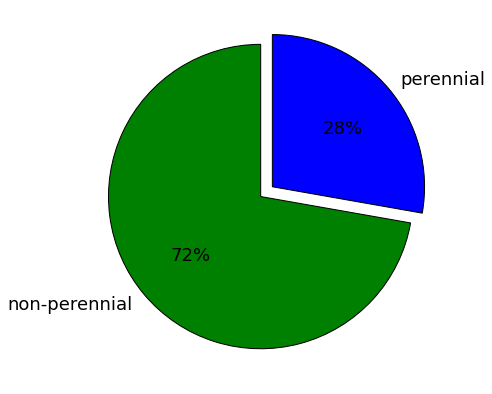

In [31]:
f,ax = plt.subplots(figsize=(7, 7))
# sns.countplot(walwatNP['stype'],
#               palette=color_map)


walwatNP_count = walwatNP.groupby(['stype'])['lengthkm'].agg('sum').to_frame()
plt.rcParams.update({'font.size': 18})
colors = ['green', 'blue']
explode = (0, 0.1)
plt.pie(walwatNP_count['lengthkm'], 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = walwatNP_count.index)

plt.savefig('../docs/wilwit_NPpie.png',dpi=600,bbox_inches = "tight")

In [322]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import xarray as xr
import matplotlib.colors as pltc
import geopandas
import datetime as dt
from scipy import stats
from sklearn import preprocessing
import s3fs
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466


## Open NWM from NOAA AWS bucket
s3_path = 's3://noaa-nwm-retro-v2-zarr-pds' #nwm 2.0

# Connect to S3
s3 = s3fs.S3FileSystem(anon=True)
store = s3fs.S3Map(root=s3_path, s3=s3, check=False)

# load the dataset
ds = xr.open_zarr(store=store, consolidated=True)

In [323]:
## Get NWM 2.0 data
# slice all data using a specific reach identifier and time range
timerange = slice('1979-01-31', '2020-12-31')
reach_id = 23428720
dat = ds.sel(feature_id=reach_id,
             time=timerange).streamflow.persist() 

# This step takes a bit longer because it's actually returning the data
dat = dat.resample(time='1d').mean()

tetNWM = pd.DataFrame(dat.to_pandas())
tetNWM['time'] = pd.to_datetime(tetNWM.index)
tetNWM.columns = ["streamflow_NWM2d0","time"]
tetNWM = tetNWM.reset_index(drop=True)

streamflow_NWM2d0       time
0              0.510000 1993-01-01
1              0.510000 1993-01-02
2              0.510000 1993-01-03
3              0.507083 1993-01-04
4              0.500000 1993-01-05
...                 ...        ...
9491           0.763750 2018-12-27
9492           0.770000 2018-12-28
9493           0.770000 2018-12-29
9494           0.770000 2018-12-30
9495           0.772917 2018-12-31

[9496 rows x 2 columns]

In [359]:
tt = pd.read_excel("../data/starkey/station_13318060_mdfDaily_time_series.xlsx")
tt['time'] = pd.to_datetime(tt['Record Date'])
tt = tt.replace(r'^\s*$',np.nan, regex=True)
# tt['streamflow_ODWR'] = tt["Mean Daily Discharge"].convert_objects(convert_numeric=True)
tt[['streamflow_ODWR']]  = tt[['Mean Daily Discharge']] .apply(pd.to_numeric)
starData = tt[['time','streamflow_ODWR']]

In [366]:
starALL = pd.merge(tetNWM,starData, on='time',how='inner')

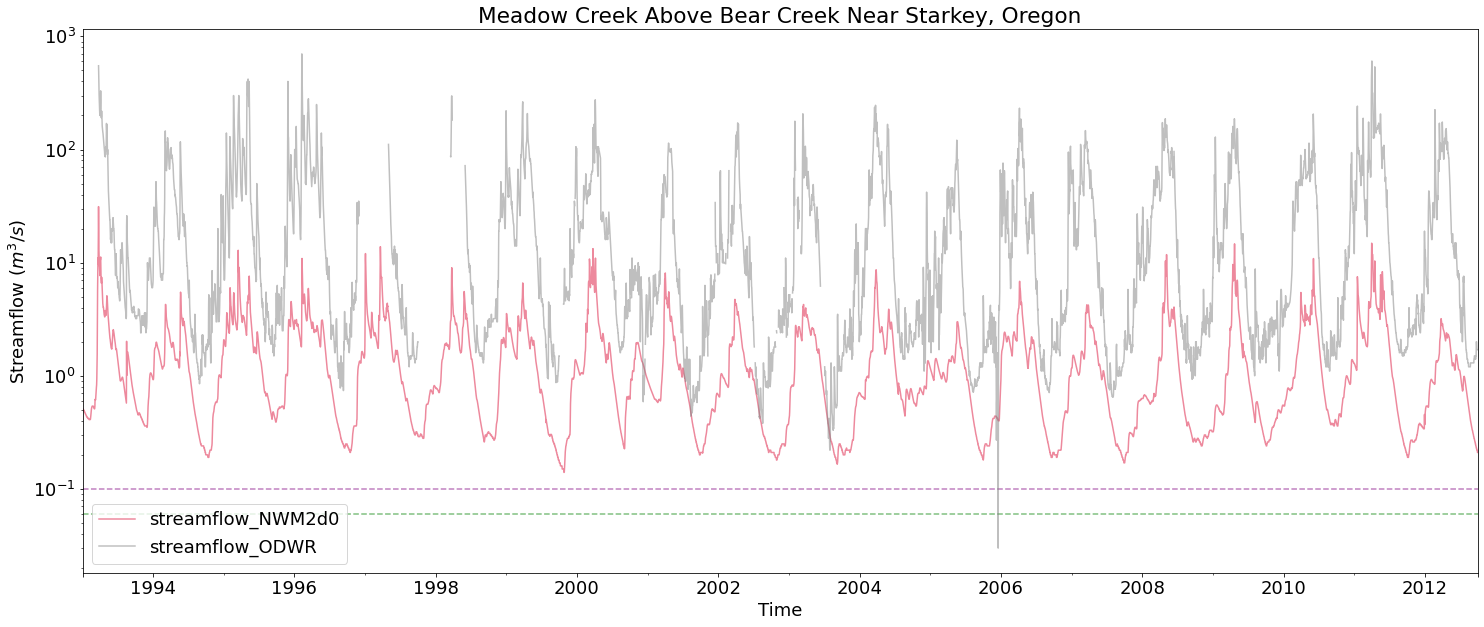

In [383]:
plt.rcParams.update({'font.size': 18})

ax = starALL.plot(x = "time",figsize = (25,10),logy=True,alpha=0.5, color = ['crimson','grey'])
plt.hlines(y=0.1,xmin = '1993-01-01', xmax = '2018-12-31',color = "purple", alpha = 0.5, linestyle='--')
plt.hlines(y=0.06,xmin = '1993-01-01', xmax = '2018-12-31',color = "green", alpha = 0.5, linestyle='--')
ax.set_xlabel('Time')
ax.set_ylabel('Streamflow $(m^3/s)$')
ax.set_title("Meadow Creek Above Bear Creek Near Starkey, Oregon")
plt.savefig("../docs/starkey_streamflow.pdf")

In [392]:
tt = starALL
tt.index = starALL['time']
tt =  tt.drop('time',axis=1)
tt = pd.DataFrame(preprocessing.minmax_scale(tt))
tt.index = starALL['time']
tt.columns = ["streamflow_NWM2d0","streamflow_ODWR"]

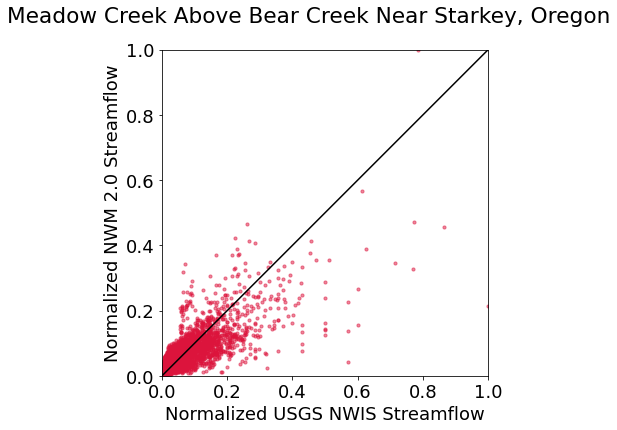

In [398]:
fig, axs = plt.subplots(figsize=(18,6),subplot_kw=dict(box_aspect=1))
fig.suptitle('Meadow Creek Above Bear Creek Near Starkey, Oregon')


axs.scatter(x = tt["streamflow_ODWR"],y=tt["streamflow_NWM2d0"],alpha = 0.5,color = 'crimson',s=10)
axs.axline(pt,slope=1, color='black')
axs.set_ylabel('Normalized NWM 2.0 Streamflow')
axs.set_xlabel('Normalized USGS NWIS Streamflow')
axs.set_ylim(0,1)
axs.set_xlim(0,1)


plt.savefig("../docs/Starkey_1to1.pdf",bbox_inches='tight')

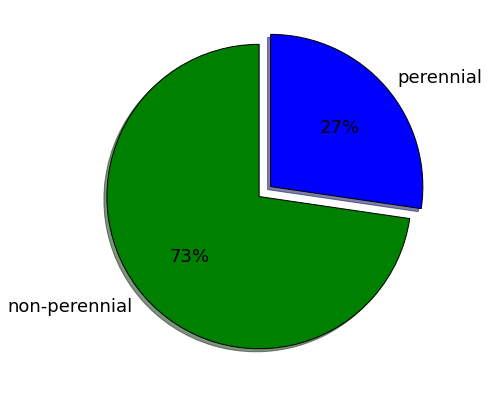

In [199]:
nhdp_pie = nhdp_hrNP.groupby(['stype'])['lengthkm'].agg('sum').to_frame()

f,ax = plt.subplots(figsize=(7, 7))
plt.rcParams.update({'font.size': 18})
colors = ['green', 'blue']
explode = (0, 0.1)

plt.pie(nhdp_pie['lengthkm'], 
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = nhdp_pie.index,
        shadow=True)
plt.show()

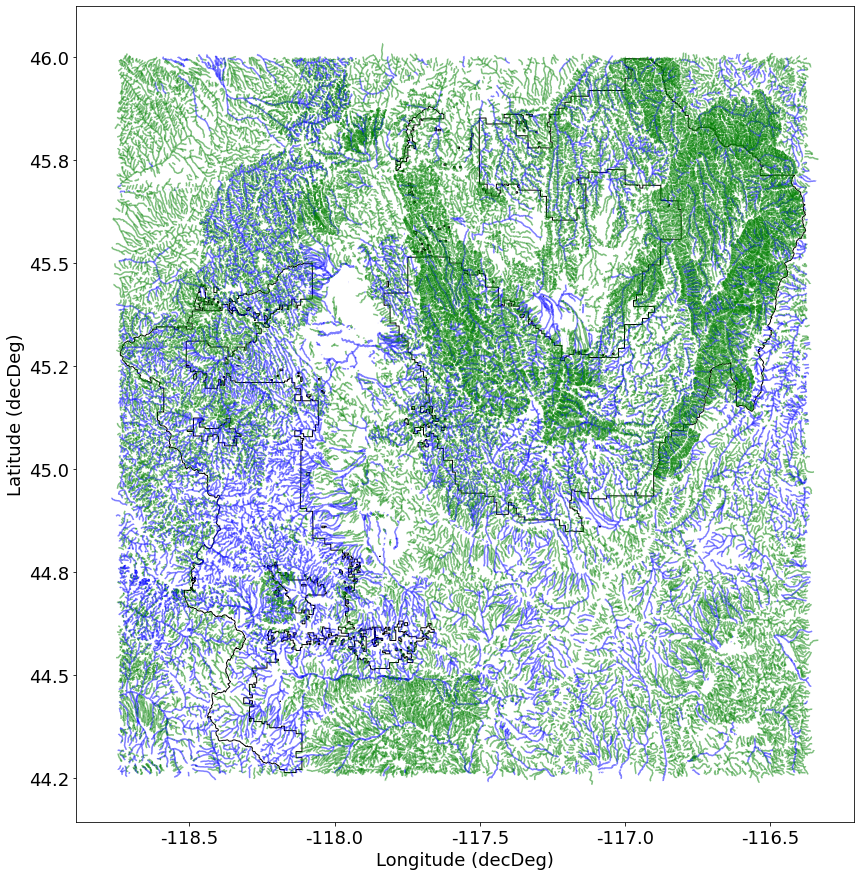

In [195]:
color_map = {'perennial': 'blue',
          'non-perennial': 'green'}


f,ax = plt.subplots(figsize=(15, 15))
nhdp_hrNP.plot(ax=ax,alpha = 0.5, color = nhdp_hrNP['stype'].map(color_map))
walwat.plot(ax=ax,edgecolor="black",facecolor="none")

plt.rcParams.update({'font.size': 18})
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))